# 10/09/2025 NIC Lab

In [2]:
# Genetic Algorithm for TSP
import random
import numpy as np

# Example cities and distance matrix
cities = ['A', 'B', 'C', 'D', 'E']
distance_matrix = np.array([
    [0, 2, 9, 10, 7],
    [1, 0, 6, 4, 3],
    [15, 7, 0, 8, 3],
    [6, 3, 12, 0, 11],
    [9, 5, 2, 7, 0]
])

def route_length(route, distance_matrix):
    length = 0
    for i in range(len(route)):
        length += distance_matrix[route[i], route[(i+1)%len(route)]]
    return length

def create_population(size, n_cities):
    population = []
    for _ in range(size):
        individual = list(range(n_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    pointer = 0
    for gene in parent2:
        if gene not in child:
            while child[pointer] is not None:
                pointer += 1
            child[pointer] = gene
    return child

def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(individual)-1)
            individual[i], individual[j] = individual[j], individual[i]
    return individual

def genetic_algorithm(distance_matrix, n_generations=500, population_size=100, mutation_rate=0.1):
    n_cities = len(distance_matrix)
    population = create_population(population_size, n_cities)
    best_route = None
    best_length = float('inf')
    for gen in range(n_generations):
        population = sorted(population, key=lambda x: route_length(x, distance_matrix))
        if route_length(population[0], distance_matrix) < best_length:
            best_length = route_length(population[0], distance_matrix)
            best_route = population[0]
        next_gen = population[:10]  # Elitism
        while len(next_gen) < population_size:
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_gen.append(child)
        population = next_gen
    return best_route, best_length

# Run the genetic algorithm
best_route, best_length = genetic_algorithm(distance_matrix)
print('Best route:', [cities[i] for i in best_route])
print('Route length:', best_length)

Best route: ['A', 'E', 'C', 'D', 'B']
Route length: 21


In [2]:
import random
import numpy as np

# ----------------------
# Helper Functions
# ----------------------
def create_distance_matrix(cities):
    n = len(cities)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                matrix[i][j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))
    return matrix

# Fitness = inverse of path distance
def fitness(route, distance_matrix):
    distance = sum(distance_matrix[route[i], route[i+1]] for i in range(len(route)-1))
    distance += distance_matrix[route[-1], route[0]]  # return to start
    return 1 / distance

def total_distance(route, distance_matrix):
    distance = sum(distance_matrix[route[i], route[i+1]] for i in range(len(route)-1))
    distance += distance_matrix[route[-1], route[0]]
    return distance

# ----------------------
# Genetic Algorithm Parts
# ----------------------
def initial_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

def selection(population, fitnesses, k=5):
    selected = random.sample(list(zip(population, fitnesses)), k)
    return max(selected, key=lambda x: x[1])[0]

def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    ptr = 0
    for city in parent2:
        if city not in child:
            while child[ptr] is not None:
                ptr += 1
            child[ptr] = city
    return child

def mutate(route, mutation_rate=0.01):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route)-1)
            route[i], route[j] = route[j], route[i]
    return route

# ----------------------
# Main GA Function
# ----------------------
def genetic_algorithm(cities, pop_size=100, generations=500, mutation_rate=0.01):
    distance_matrix = create_distance_matrix(cities)
    population = initial_population(pop_size, len(cities))

    best_route = None
    best_distance = float('inf')

    for gen in range(generations):
        fitnesses = [fitness(ind, distance_matrix) for ind in population]
        new_population = []

        for _ in range(pop_size):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        # Track best
        for ind in population:
            dist = total_distance(ind, distance_matrix)
            if dist < best_distance:
                best_distance = dist
                best_route = ind

        if gen % 50 == 0:
            print(f"Generation {gen} -> Best Distance: {best_distance:.2f}")

    return best_route, best_distance

# ----------------------
# Example Usage
# ----------------------
if __name__ == "__main__":
    # Cities as (x, y) coordinates
    cities = [(0,0), (1,5), (5,2), (6,6), (8,3), (2,9)]
    best_route, best_distance = genetic_algorithm(cities, pop_size=200, generations=500, mutation_rate=0.02)

    print("\nBest Route Found:", best_route)
    print("Best Distance:", best_distance)

Generation 0 -> Best Distance: 26.38
Generation 50 -> Best Distance: 26.38
Generation 50 -> Best Distance: 26.38
Generation 100 -> Best Distance: 26.38
Generation 150 -> Best Distance: 26.38
Generation 100 -> Best Distance: 26.38
Generation 150 -> Best Distance: 26.38
Generation 200 -> Best Distance: 26.38
Generation 200 -> Best Distance: 26.38
Generation 250 -> Best Distance: 26.38
Generation 250 -> Best Distance: 26.38
Generation 300 -> Best Distance: 26.38
Generation 350 -> Best Distance: 26.38
Generation 300 -> Best Distance: 26.38
Generation 350 -> Best Distance: 26.38
Generation 400 -> Best Distance: 26.38
Generation 400 -> Best Distance: 26.38
Generation 450 -> Best Distance: 26.38

Best Route Found: [3, 5, 1, 0, 2, 4]
Best Distance: 26.375118881977315
Generation 450 -> Best Distance: 26.38

Best Route Found: [3, 5, 1, 0, 2, 4]
Best Distance: 26.375118881977315


Starting genetic algorithm...
Generation 50: Best Distance = 928.03
Generation 100: Best Distance = 907.92
Generation 150: Best Distance = 907.92
Generation 200: Best Distance = 907.92
Generation 250: Best Distance = 907.92
Generation 300: Best Distance = 907.92
Generation 350: Best Distance = 907.92
Generation 400: Best Distance = 907.92
Generation 450: Best Distance = 907.92
Generation 500: Best Distance = 907.92

Genetic algorithm finished.
Final best distance: 907.92


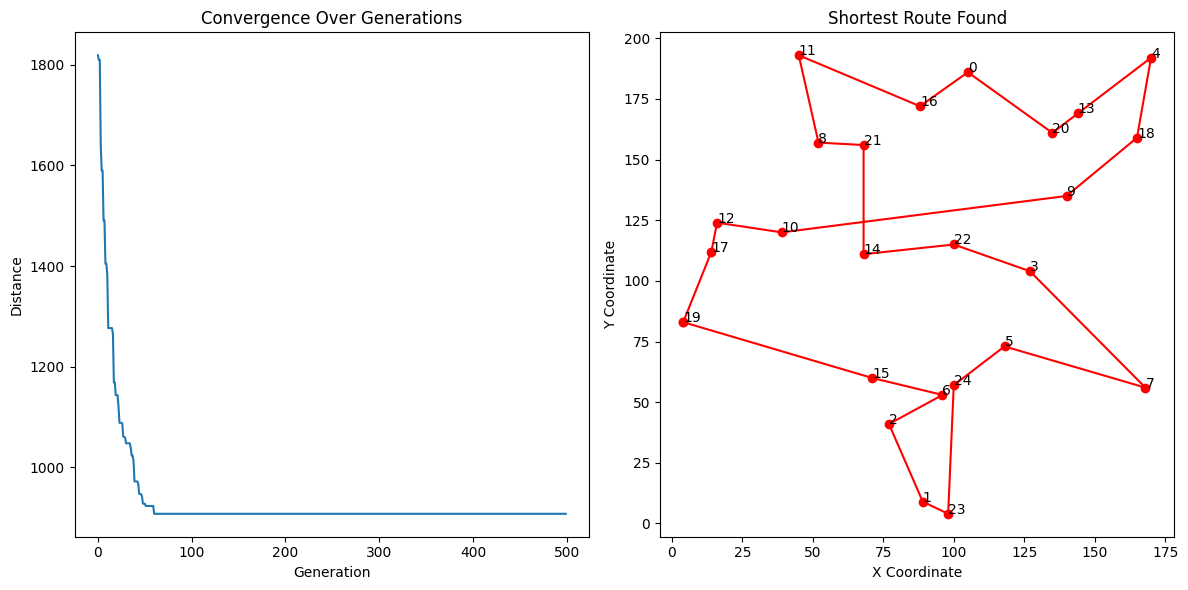


Best route found:
19 -> 15 -> 6 -> 2 -> 1 -> 23 -> 24 -> 5 -> 7 -> 3 -> 22 -> 14 -> 21 -> 8 -> 11 -> 16 -> 0 -> 20 -> 13 -> 4 -> 18 -> 9 -> 10 -> 12 -> 17 -> 19


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- 1. Problem Setup ---

# Define the cities as (x, y) coordinates
num_cities = 25
cities = []
for i in range(num_cities):
    cities.append((random.randint(0, 200), random.randint(0, 200)))

# Calculate the distance matrix (Euclidean distance)
def create_distance_matrix(city_list):
    """Creates a matrix of distances between each pair of cities."""
    num = len(city_list)
    dist_matrix = np.zeros((num, num))
    for i in range(num):
        for j in range(i, num):
            dist = np.sqrt((city_list[i][0] - city_list[j][0])**2 + (city_list[i][1] - city_list[j][1])**2)
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

distance_matrix = create_distance_matrix(cities)

# --- 2. Genetic Algorithm Components ---

def create_initial_population(size, num_cities):
    """Creates an initial population of random routes."""
    population = []
    for _ in range(size):
        # A route is a permutation of city indices
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

def calculate_fitness(route, dist_matrix):
    """Calculates the fitness of a route (1 / total distance)."""
    total_distance = 0
    for i in range(len(route)):
        # Distance from current city to the next
        from_city = route[i]
        to_city = route[(i + 1) % len(route)] # Wrap around for return trip
        total_distance += dist_matrix[from_city][to_city]
    return 1 / total_distance

def rank_routes(population, dist_matrix):
    """Ranks the population by fitness."""
    fitness_results = {}
    for i, route in enumerate(population):
        fitness_results[i] = calculate_fitness(route, dist_matrix)
    return sorted(fitness_results.items(), key=lambda x: x[1], reverse=True)

def selection(ranked_pop, elite_size):
    """Selects parents using tournament selection, including elites."""
    selection_results = []
    # Keep the best individuals (elitism)
    for i in range(elite_size):
        selection_results.append(ranked_pop[i][0])
    
    # Use tournament selection for the rest
    # Note: A simpler method like Roulette Wheel or just taking from the ranked list also works
    # For simplicity, we will just select from the fittest individuals
    for i in range(len(ranked_pop) - elite_size):
        # Pick from the top 50% of the population to increase convergence speed
        idx = ranked_pop[random.randint(0, len(ranked_pop)//2)][0]
        selection_results.append(idx)
        
    return selection_results

def get_mating_pool(population, selection_results):
    """Creates the mating pool from the selected parents."""
    mating_pool = []
    for i in selection_results:
        mating_pool.append(population[i])
    return mating_pool

def crossover(parent1, parent2):
    """Performs ordered crossover (OX1)."""
    child = [None] * len(parent1)
    
    start, end = sorted(random.sample(range(len(parent1)), 2))
    
    # Copy the slice from parent1 to the child
    child[start:end] = parent1[start:end]
    
    # Fill the remaining slots with genes from parent2
    parent2_genes = [item for item in parent2 if item not in child]
    
    # Fill the remaining None slots in the child
    current_pos = 0
    for gene in parent2_genes:
        while child[current_pos] is not None:
            current_pos += 1
        child[current_pos] = gene
        
    return child

def breed_population(mating_pool, elite_size):
    """Creates the next generation through crossover."""
    children = []
    num_non_elites = len(mating_pool) - elite_size
    
    # Keep the elites
    for i in range(elite_size):
        children.append(mating_pool[i])
    
    # Create new children
    pool = random.sample(mating_pool, len(mating_pool))
    for i in range(num_non_elites):
        child = crossover(pool[i], pool[len(mating_pool) - i - 1])
        children.append(child)
        
    return children

def mutate(individual, mutation_rate):
    """Performs swap mutation on an individual."""
    for swapped in range(len(individual)):
        if random.random() < mutation_rate:
            swap_with = random.randint(0, len(individual) - 1)
            
            # Swap the two cities
            city1 = individual[swapped]
            city2 = individual[swap_with]
            individual[swapped] = city2
            individual[swap_with] = city1
    return individual

def mutate_population(population, mutation_rate, elite_size):
    """Mutates the entire population, skipping the elites."""
    mutated_pop = []
    # Keep elites unchanged
    for ind in population[:elite_size]:
        mutated_pop.append(ind)
    # Mutate the rest
    for ind in population[elite_size:]:
        mutated_pop.append(mutate(ind, mutation_rate))
    return mutated_pop

def next_generation(current_gen, elite_size, mutation_rate, dist_matrix):
    """Orchestrates the creation of the next generation."""
    ranked_pop = rank_routes(current_gen, dist_matrix)
    selection_results = selection(ranked_pop, elite_size)
    mating_pool = get_mating_pool(current_gen, selection_results)
    children = breed_population(mating_pool, elite_size)
    next_gen = mutate_population(children, mutation_rate, elite_size)
    return next_gen


# --- 3. Running the Algorithm ---

def genetic_algorithm(cities, pop_size, elite_size, mutation_rate, generations):
    """The main genetic algorithm function."""
    dist_matrix = create_distance_matrix(cities)
    population = create_initial_population(pop_size, len(cities))
    
    best_route = None
    best_distance = float('inf')
    progress = []

    print("Starting genetic algorithm...")
    
    for i in range(generations):
        population = next_generation(population, elite_size, mutation_rate, dist_matrix)
        
        # Get the best route of the current generation
        current_best_rank = rank_routes(population, dist_matrix)[0]
        current_best_route = population[current_best_rank[0]]
        current_best_dist = 1 / current_best_rank[1]
        
        if current_best_dist < best_distance:
            best_distance = current_best_dist
            best_route = current_best_route
        
        progress.append(best_distance)
        if (i+1) % 50 == 0:
            print(f"Generation {i+1}: Best Distance = {best_distance:.2f}")

    print("\nGenetic algorithm finished.")
    print(f"Final best distance: {best_distance:.2f}")

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plotting convergence
    plt.subplot(1, 2, 1)
    plt.plot(progress)
    plt.title("Convergence Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Distance")

    # Plotting the best route
    plt.subplot(1, 2, 2)
    x_coords = [cities[i][0] for i in best_route]
    y_coords = [cities[i][1] for i in best_route]
    x_coords.append(cities[best_route[0]][0]) # Return to start
    y_coords.append(cities[best_route[0]][1]) # Return to start

    plt.plot(x_coords, y_coords, 'ro-')
    plt.title("Shortest Route Found")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i))

    plt.tight_layout()
    plt.show()
    
    return best_route, best_distance


if __name__ == '__main__':
    # GA parameters
    POPULATION_SIZE = 100
    ELITE_SIZE = 20
    MUTATION_RATE = 0.01
    GENERATIONS = 500
    
    best_route, best_distance = genetic_algorithm(
        cities=cities, 
        pop_size=POPULATION_SIZE, 
        elite_size=ELITE_SIZE, 
        mutation_rate=MUTATION_RATE, 
        generations=GENERATIONS
    )
    print("\nBest route found:")
    print(" -> ".join(map(str, best_route)) + f" -> {best_route[0]}")